## Clustering on CAR MPG Dataset

This data set is about 2nd Hand cars. This 2nd hand cars includes from Europe , Asia and US. Can I look at attribute of a Car and guess whats the milegae of the car is  (mpg)

In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpg_df= pd.read_csv("./Downloads/car-mpg.csv")

In [4]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [5]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [6]:
## As HP attribute is string , finding out the unique values that are non-digits
filt = mpg_df['hp'].str.isdigit() == False
mpg_df.loc[filt].hp.unique()

array(['?'], dtype=object)

#### Replace ? with np.nan and convert data type to Float

In [7]:
mpg_df = mpg_df.replace('?',np.nan)
mpg_df['hp'] = mpg_df['hp'].astype('float64')

#### Fill NAN value based on Media value

In [8]:
mpg_df['hp']= mpg_df['hp'].fillna(mpg_df['hp'].median())

In [9]:
### Find out if any more NAN value exists in data set
nan_df = mpg_df[mpg_df.isna().any(axis=1)]
nan_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name


In [10]:
### Dropping car name as its a char column contains car name details and not useful in analyzing distribution
mpg_df_attr = mpg_df.iloc[:,0:9]
mpg_df_attr['disp_per_cyl'] = mpg_df_attr['disp'] / mpg_df_attr['cyl']
mpg_df_attr

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,disp_per_cyl
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,38.375
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,43.750
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,39.750
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,38.000
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,37.750
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,1,35.000
394,44.0,4,97.0,52.0,2130,24.6,82,2,1,24.250
395,32.0,4,135.0,84.0,2295,11.6,82,1,1,33.750
396,28.0,4,120.0,79.0,2625,18.6,82,1,1,30.000


C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


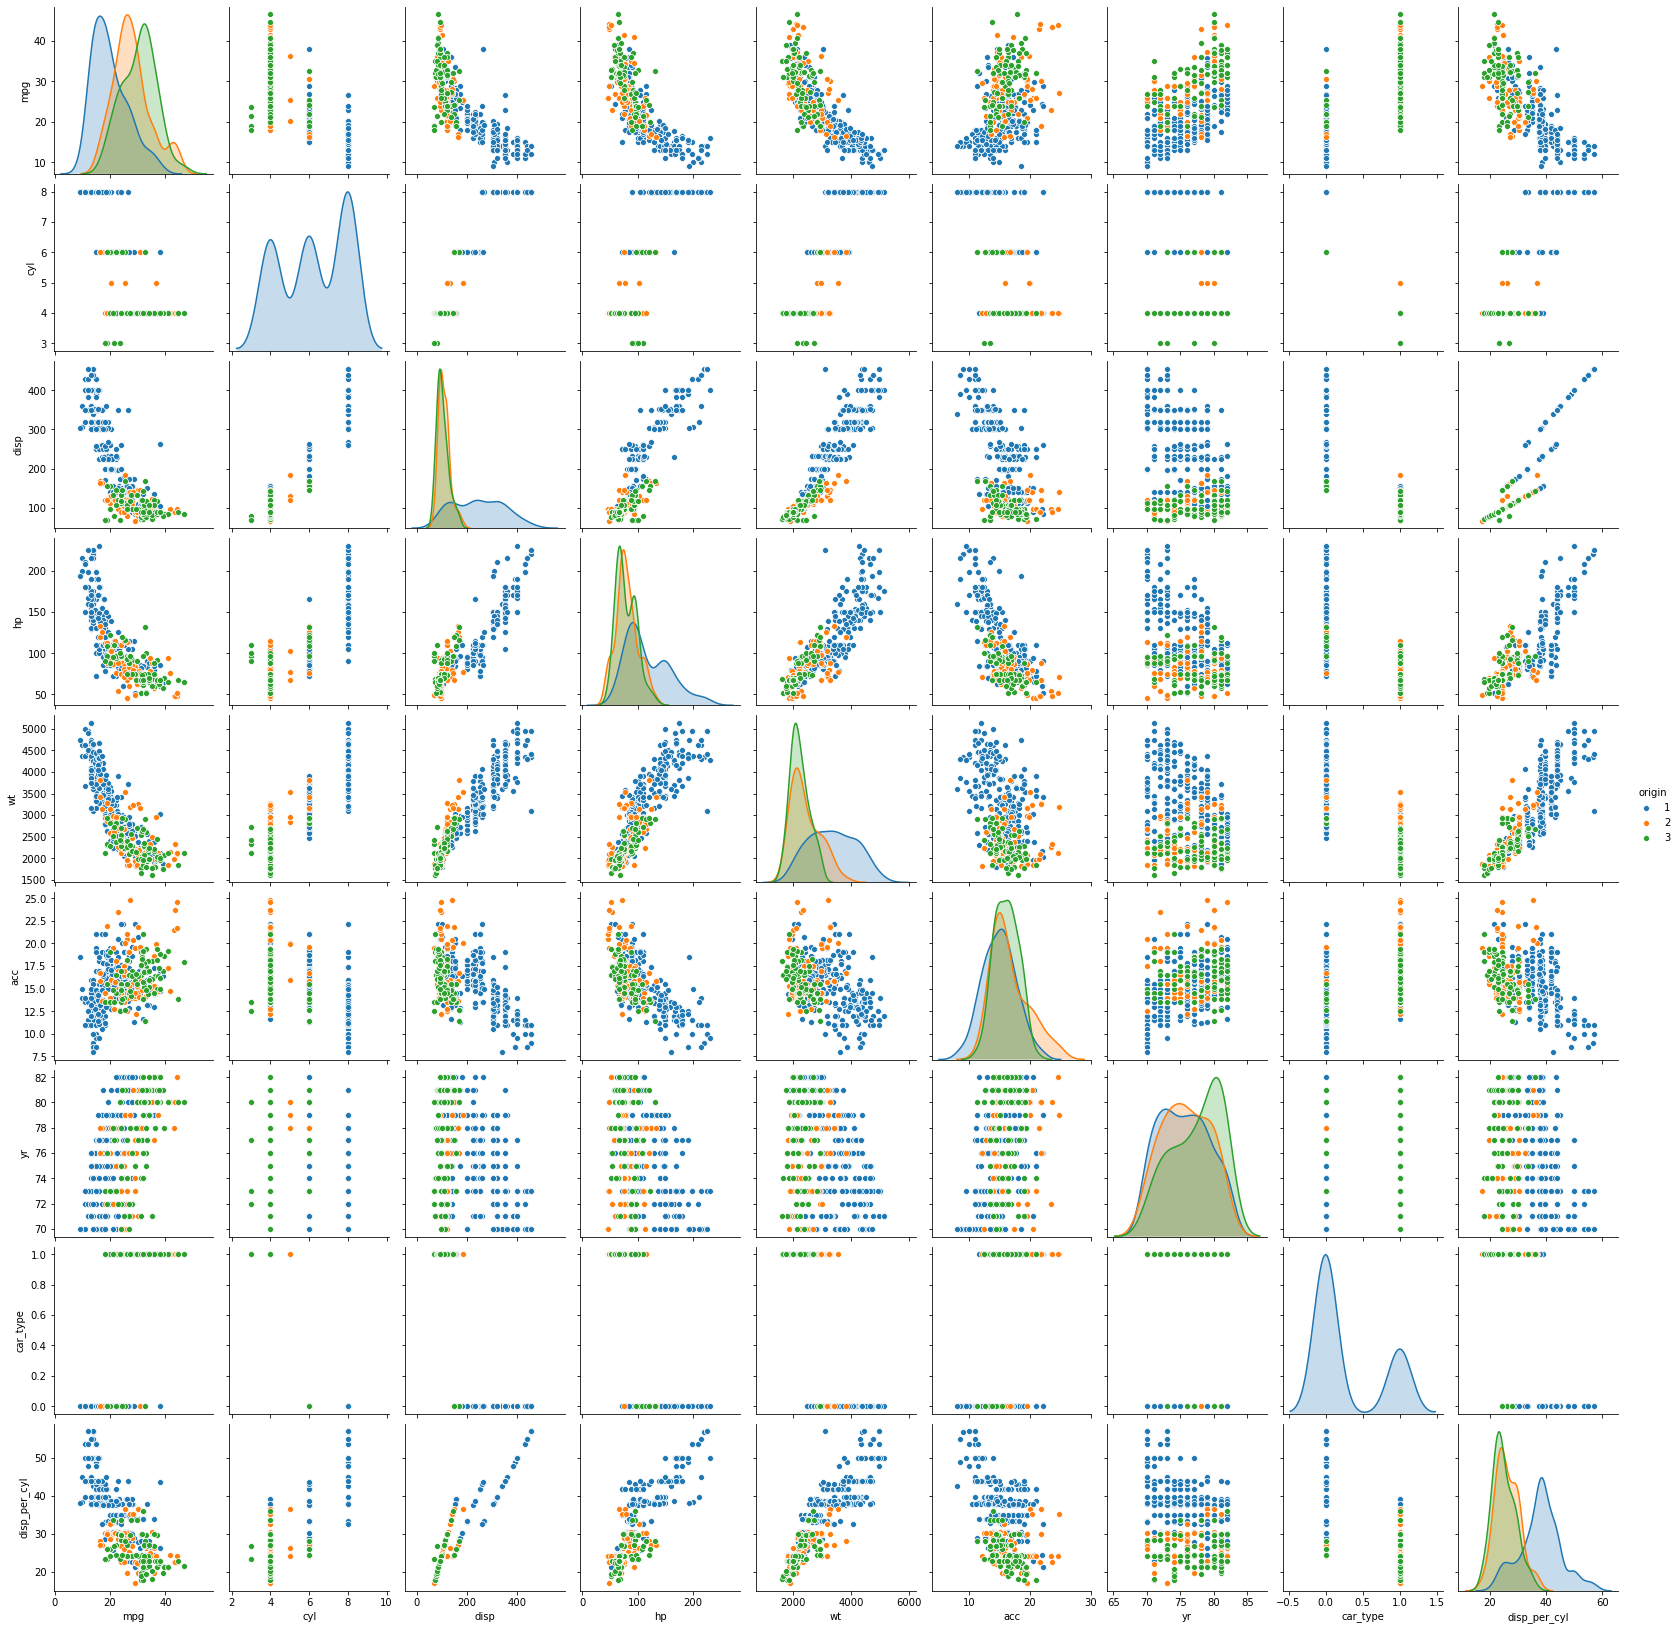

In [11]:
sns.pairplot(mpg_df_attr,diag_kind='kde',hue='origin') # to plot dencity curve

getting 3 cluster in this kernal dencity estimate
but Within each cluster for few dimesions , there looks to be more than 3  clusters i.e. within category , there are sub-category
so number of dataset , there are likely to be more than 3 clusters when we merge data set across dimensions.


## K-Means Clustering 

##### Calculate Z Score for each Dimension

Z-score also known as standard score gives us an idea of how far a data point is from the mean. 
It indicates how many standard deviations an element is from the mean. 
In order to use a z-score, we need to know the population mean (μ) and also the population standard deviation (σ).

z = (x-mean)/std dev


#### Interpretation of Z-score :

An element having a z-score less than 0 represents that the element is less than the mean. 

An element having a z-score greater than 0 represents that the element is greater than the mean.

An element having a z-score equal to 0 represents that the element is equal to the mean.

An element having a z-score equal to 1 represents that the element is 1 standard deviation greater than the mean; a z-score equal to 2, 2 standard deviations greater than the mean, and so on.

An element having a z-score equal to -1 represents that the element is 1 standard deviation less than the mean; a z-score equal to -2, 2 standard deviations less than the mean, and so on.

If the number of elements in a given set is large, then about 68% of the elements have a z-score between -1 and 1; about 95% have a z-score between -2 and 2; about 99% have a z-score between -3 and 3.


In [12]:
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:,'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

#remove origin & year column
mpg_df_attr_z.pop('origin')
mpg_df_attr_z.pop('yr')
mpg_df_attr_z

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117
...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822


In [13]:
cluster_range = range(2,6) # expecting 3 to 4 clusters from the pair panel visiual inspection 
cluster_errors=[]

for num_clusters in cluster_range:
    clusters =    KMeans(num_clusters,n_init = 5 ) # n_init is number of time we like Kmeans to iterate 
    clusters.fit(mpg_df_attr)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_  # centroid of each cluster 
    cluster_errors.append(clusters.inertia_) # inertia is sum of variance within each cluster

clusters_df = pd.DataFrame({"num_clusters" : cluster_range , "Cluster_Errors" : cluster_errors})
clusters_df 

,num_clusters,Cluster_Errors
0,2,7.428960e+07
1,3,3.420817e+07
2,4,1.905669e+07
3,5,1.376977e+07


Text(0.5, 0, 'number of clusters')

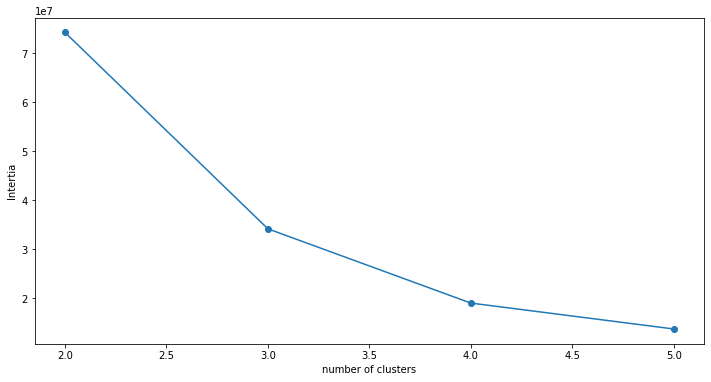

In [21]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.Cluster_Errors,marker="o")
plt.ylabel("Intertia")
plt.xlabel("number of clusters")

Natually there are 3 clusters in dataset but as per Elbow plot , the drop in error for 4 clusters is much severe 
when compare to 3 cluster that cant be ignored.
So our visiual analysis of having 3 to 4 clusters is confimred by above Elbow plot.

Random state in Kmeans function of sklearn mainly helps to

    Start with same random data point as centroid if you use Kmeans++ for initializing centroids.
    Start with same K random data points as centroid if you use random initialization.
This helps when one wants to reproduce results at some later point in time.

In [15]:
cluster = KMeans(n_clusters=4, random_state=2354)
cluster.fit(mpg_df_attr_z)
mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

In [16]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.56930351, -0.84746902, -0.75211548, -0.48243632, -0.70707286,
        -0.19616096],
       [-0.51001261,  0.40212541,  0.29436282, -0.08700192,  0.32691222,
         0.34920732],
       [-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [ 0.99149249, -0.81998551, -0.85895557, -0.91817479, -0.85174625,
         1.21960744]])

In [17]:
centroid_df = pd.DataFrame(centroids,columns = list(mpg_df_attr_z))
centroid_df

,mpg,cyl,disp,hp,wt,acc
0,0.569304,-0.847469,-0.752115,-0.482436,-0.707073,-0.196161
1,-0.510013,0.402125,0.294363,-0.087002,0.326912,0.349207
2,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
3,0.991492,-0.819986,-0.858956,-0.918175,-0.851746,1.219607


In [18]:
prediction = cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction  # GROUP column will tell which cluster this particular column belong to
mpg_df_attr_z

,mpg,cyl,disp,hp,wt,acc,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,2
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,2
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,2
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,2
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,2
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,0
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,3
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,0
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,3


#### instead of interpreting neumerical values of the centroids , lets do a visiual analysis by converting the centroids 
and the data in a cluster into a box plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F483CFB7C0>,
      dtype=object)

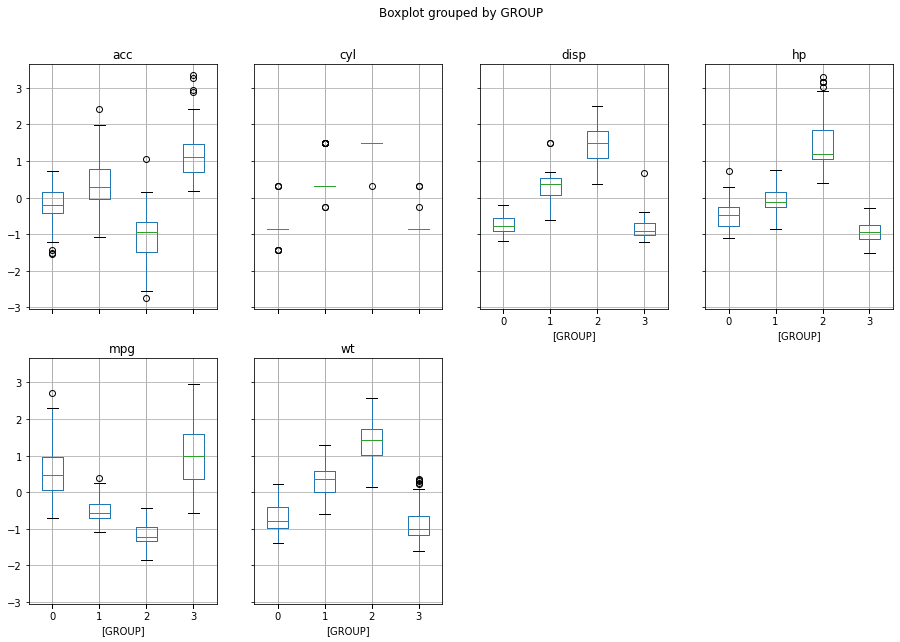

In [23]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by='GROUP',layout = (2,4), figsize = (15,10))

### Observations

for Dim -->

acceleration , there are 4 clusters and many outliers. Also there is a overlap in couple of clusters thats not a very good sign.
Displacement --> clusters are overlapping

May be its a 4 cluster , overlaping clusters might merge into one and we might get 3 unique clusters.

Also outliers represent loose cluster i.e. cluster is large and loose.

#### Lets Handle outliers at GROUP level

In [36]:
data = mpg_df_attr_z

def replace(group):
    median,std = group.median(),group.std() # get median & stg dev of each group
    outliers = (group - median).abs() > 2*std  # substract median from every member of each group, take abs value . Any data point beyond 2 std , replace with median
    group[outliers] = group.median()
    return group

data_corrected = (data.groupby('GROUP').transform(replace))
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


<ipython-input-36-b618bf102fb8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group[outliers] = group.median()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F486AE3B50>,
      dtype=object)

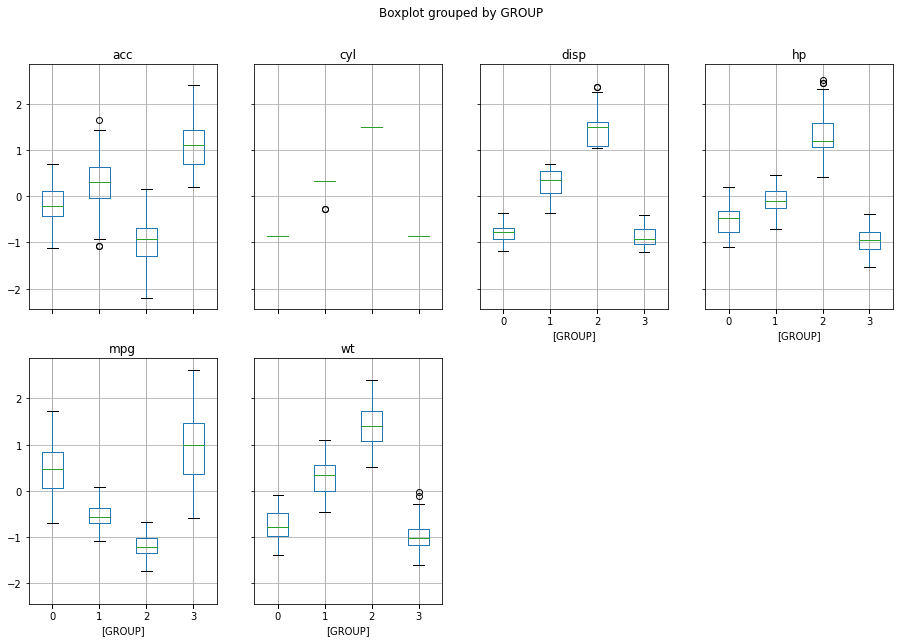

In [38]:
import matplotlib.pylab as plt

concat_data.boxplot(by='GROUP',layout = (2,4), figsize = (15,10))

very few outliers now
when ever we handle outliers and replace then with medians, it will result into sharper distribution and the data points that were not outliers in first iteration are being flagged as outliers. 
So until we are handling first set of outliers we are good and above flagged outliers can be ignored.


But again Boxes are overlapping in few dimes. so Dimensions are not helping me to find indepdent clusters.

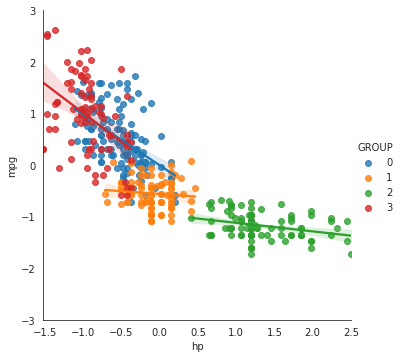

In [40]:
# lets analyze data using scatter plot

var = 'hp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

#### observation

green / orange is large cars ( very high HP) .. RED one are small cars with less HP.
HP is not very good predictor for large cars as slope is almost 0
but for small cars , betwee  HP and mpg , looks a very strong negative liners relationship i.e. less hp , more milage.

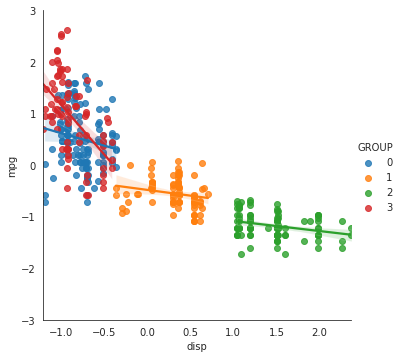

In [41]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

#### Observation : 

For large cars this dim si also a weak predictor but for small cars for strong predictor.
so ideally we should build two diferent model for small and large cars and attribute will vary for both these models depending on 
which attribute will help us to predict a model better based on strong predictor attributes.